# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
from src.make_db import create_movies_db

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [4]:
table_name_query = '''SELECT *
                        FROM tmdb_movies 
                        JOIN bom_movie_gross
                        ON tmdb_movies.title = bom_movie_gross.title'''
pd.read_sql(table_name_query, conn)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,None,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,None,2018


In [5]:
df = pd.read_sql(table_name_query, conn)
df

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,None,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,None,2018


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  idx                2703 non-null   int64  
 11  title              2703 non-null   object 
 12  studio             2702 non-null   object 
 13  domestic_gross     2682 non-null   float64
 14  foreign_gross      1723 non-null   object 
 15  year               2703 non-null   int64  
dtypes: float64(3), int64(5),

In [7]:
df.describe()

,idx,id,popularity,vote_average,vote_count,idx,domestic_gross,year
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2.682000e+03,2703.000000
mean,11686.778024,213291.491306,10.002752,6.418572,1358.194599,1711.532741,3.629150e+07,2014.044395
std,7459.175381,139706.978070,7.294182,0.916424,2408.885097,960.515610,7.734897e+07,2.440458
min,1.000000,1771.000000,0.600000,0.000000,1.000000,0.000000,1.000000e+02,2010.000000
25%,5289.000000,76493.500000,5.881000,5.900000,78.000000,885.500000,2.000000e+05,2012.000000
50%,11319.000000,209249.000000,8.627000,6.500000,393.000000,1753.000000,3.800000e+06,2014.000000
75%,17675.000000,334521.500000,12.698500,7.000000,1440.000000,2524.500000,3.882500e+07,2016.000000
max,26506.000000,574534.000000,80.773000,10.000000,22186.000000,3386.000000,9.367000e+08,2018.000000


In [8]:
df.fillna(0, inplace=True)
df

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,0,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,0,2018


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  idx                2703 non-null   int64  
 11  title              2703 non-null   object 
 12  studio             2703 non-null   object 
 13  domestic_gross     2703 non-null   float64
 14  foreign_gross      2703 non-null   object 
 15  year               2703 non-null   int64  
dtypes: float64(3), int64(5),

Comparing the data bewteen popularity and vote count and also popularity and domestic_gross.

In [10]:
df = df.drop(['idx', 'id', 'genre_ids', 'original_language',], axis = 1)
df

,original_title,popularity,release_date,title,vote_average,vote_count,title,studio,domestic_gross,foreign_gross,year
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000,2010
2,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000,2010
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000,2010
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,Spotlight,ORF,45100000.0,53200000,2015
2699,The Judge,0.600,2018-04-13,The Judge,7.5,2,The Judge,WB,47100000.0,37300000,2014
2700,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,Flowers,MBox,61600.0,0,2015
2701,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,Last Letter,CL,181000.0,0,2018


In [11]:
df.drop_duplicates(inplace=True)

<ipython-input-11-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
df

,original_title,popularity,release_date,title,vote_average,vote_count,title,studio,domestic_gross,foreign_gross,year
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000,2010
2,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000,2010
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000,2010
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,Spotlight,ORF,45100000.0,53200000,2015
2699,The Judge,0.600,2018-04-13,The Judge,7.5,2,The Judge,WB,47100000.0,37300000,2014
2700,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,Flowers,MBox,61600.0,0,2015
2701,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,Last Letter,CL,181000.0,0,2018


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df['vote_average']

0        7.7
1        6.8
2        8.3
3        7.7
4        7.2
        ... 
2698    10.0
2699     7.5
2700     6.0
2701     6.0
2702     0.0
Name: vote_average, Length: 2456, dtype: float64

Make a bar graph comparing the number of votes for movies and what their average voting rating is.

Text(0, 0.5, 'Number of Votes')

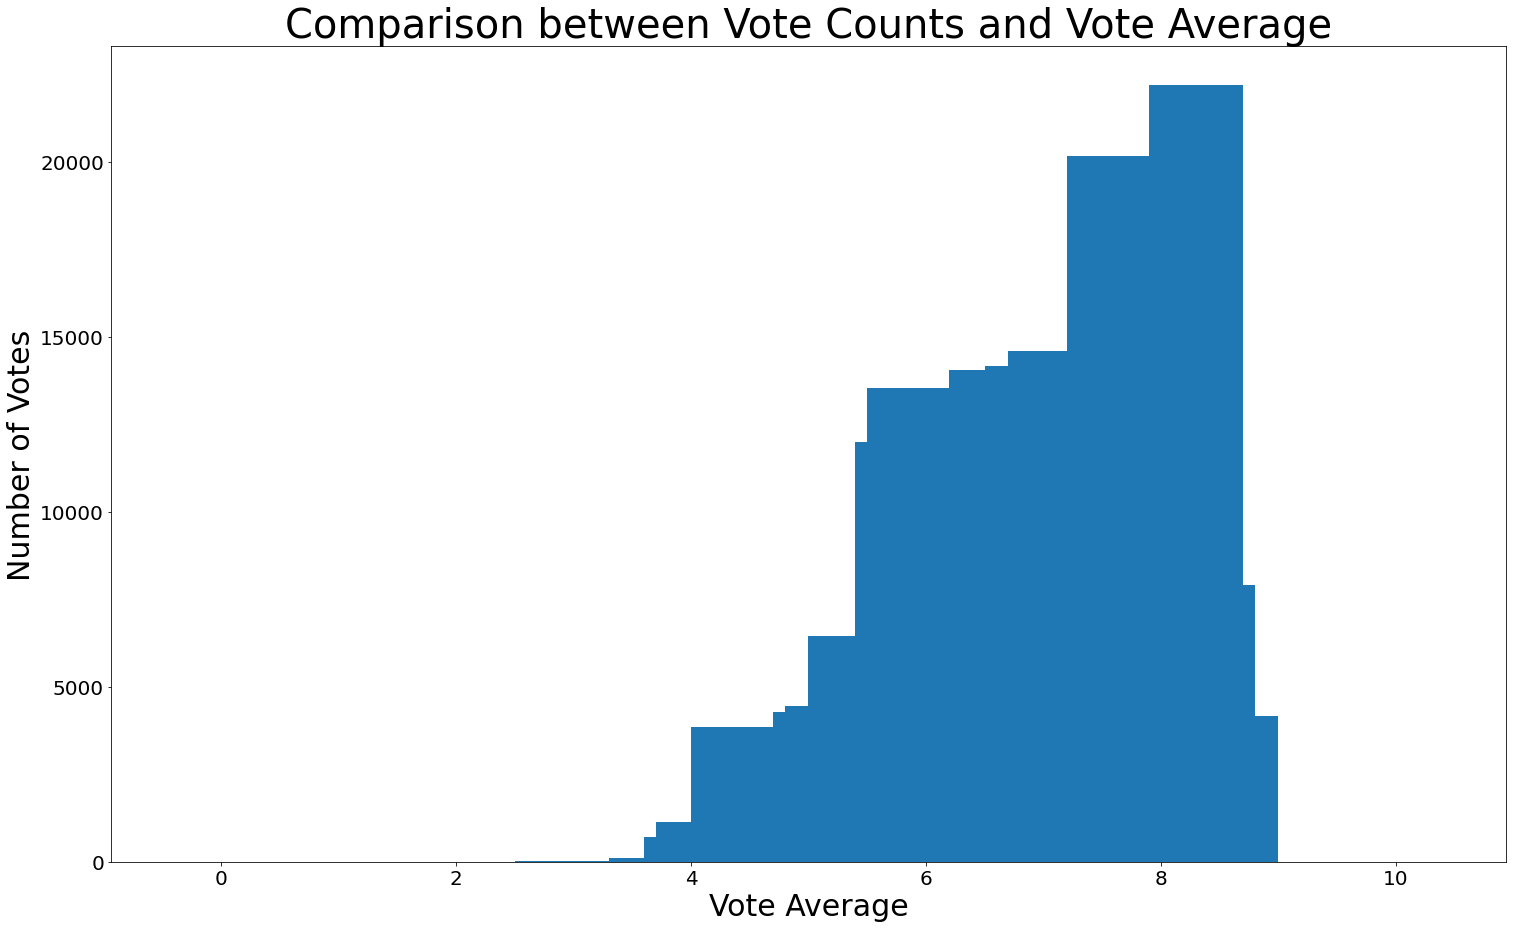

In [15]:

#voting_counts = df.value_counts()

x = df['vote_average'].values
y = df['vote_count'].values

plot_one_fig, plot_one_ax = plt.subplots(figsize=(25,15))
plot_one_ax.bar(x, y)

plot_one_ax.tick_params(axis='x', labelsize=20)
plot_one_ax.tick_params(axis='y', labelsize=20)
plot_one_ax.set_title('Comparison between Vote Counts and Vote Average', fontsize=40)
plot_one_ax.set_xlabel('Vote Average', fontsize=30)
plot_one_ax.set_ylabel('Number of Votes', fontsize=30)

This graph shows that as the number of votes increased, the vote average also increased.

Bring in a new dataset with data about yearly box office income.

In [16]:
df2 = pd.read_csv('data/project_data.csv')
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
0,NaN,NaN,NaN,Adjusted Box Office,Ticket Price
1,2021.0,"182,519,895","$1,671,882,236","$1,671,882,236",$9.16
2,2020.0,"223,880,995","$2,050,751,679","$2,050,751,679",$9.16
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
9,2013.0,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              27 non-null     float64
 1   Tickets Sold      27 non-null     object 
 2   Total Box Office  27 non-null     object 
 3   Total Inflation   28 non-null     object 
 4   Average           27 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.2+ KB


In [18]:
df2 = df2.sort_values(['Tickets Sold'], ascending=True)
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
27,1995.0,"1,221,696,643","$5,314,381,090","$11,190,741,247",NaN
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
11,2011.0,"1,282,915,168","$10,173,519,704","$11,751,502,955",$7.93
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
26,1996.0,"1,305,216,770","$5,769,058,904","$11,955,740,509",$4.42
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
12,2010.0,"1,328,549,023","$10,482,254,025","$12,169,509,052",$7.89


In [19]:
df2 = df2.dropna()
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
11,2011.0,"1,282,915,168","$10,173,519,704","$11,751,502,955",$7.93
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
26,1996.0,"1,305,216,770","$5,769,058,904","$11,955,740,509",$4.42
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
12,2010.0,"1,328,549,023","$10,482,254,025","$12,169,509,052",$7.89
9,2013.0,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13


In [20]:
df2 = df2.drop(['Total Box Office', 'Total Inflation', 'Average',], axis = 1)

df2

,Year,Tickets Sold
5,2017.0,"1,225,639,761"
3,2019.0,"1,228,763,381"
8,2014.0,"1,257,400,618"
11,2011.0,"1,282,915,168"
6,2016.0,"1,301,658,904"
26,1996.0,"1,305,216,770"
4,2018.0,"1,311,323,188"
7,2015.0,"1,323,267,005"
12,2010.0,"1,328,549,023"
9,2013.0,"1,339,168,926"


In [21]:
df2 = df2.sort_values(['Tickets Sold'], ascending=False)
df2

,Year,Tickets Sold
2,2020.0,"223,880,995"
1,2021.0,"182,519,895"
20,2002.0,"1,575,756,527"
19,2003.0,"1,524,585,021"
18,2004.0,"1,495,651,298"
21,2001.0,"1,465,874,205"
23,1999.0,"1,444,664,086"
24,1998.0,"1,443,827,003"
15,2007.0,"1,420,036,680"
13,2009.0,"1,418,567,388"


In [22]:
df2['Tickets Sold'] = df2['Tickets Sold'].str.replace(',','').astype(int)
df2

,Year,Tickets Sold
2,2020.0,223880995
1,2021.0,182519895
20,2002.0,1575756527
19,2003.0,1524585021
18,2004.0,1495651298
21,2001.0,1465874205
23,1999.0,1444664086
24,1998.0,1443827003
15,2007.0,1420036680
13,2009.0,1418567388


In [23]:
df2.dtypes

Year            float64
Tickets Sold      int64
dtype: object

In [24]:
df2 = df2.sort_values(['Year'], ascending=True)
df2

,Year,Tickets Sold
26,1996.0,1305216770
25,1997.0,1385218935
24,1998.0,1443827003
23,1999.0,1444664086
22,2000.0,1397460079
21,2001.0,1465874205
20,2002.0,1575756527
19,2003.0,1524585021
18,2004.0,1495651298
17,2005.0,1372980280


In [25]:
df2['Year'].index

Int64Index([26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
             9,  8,  7,  6,  5,  4,  3,  2,  1],
           dtype='int64')

Text(0, 0.5, 'Tickets Sold (in millions)')

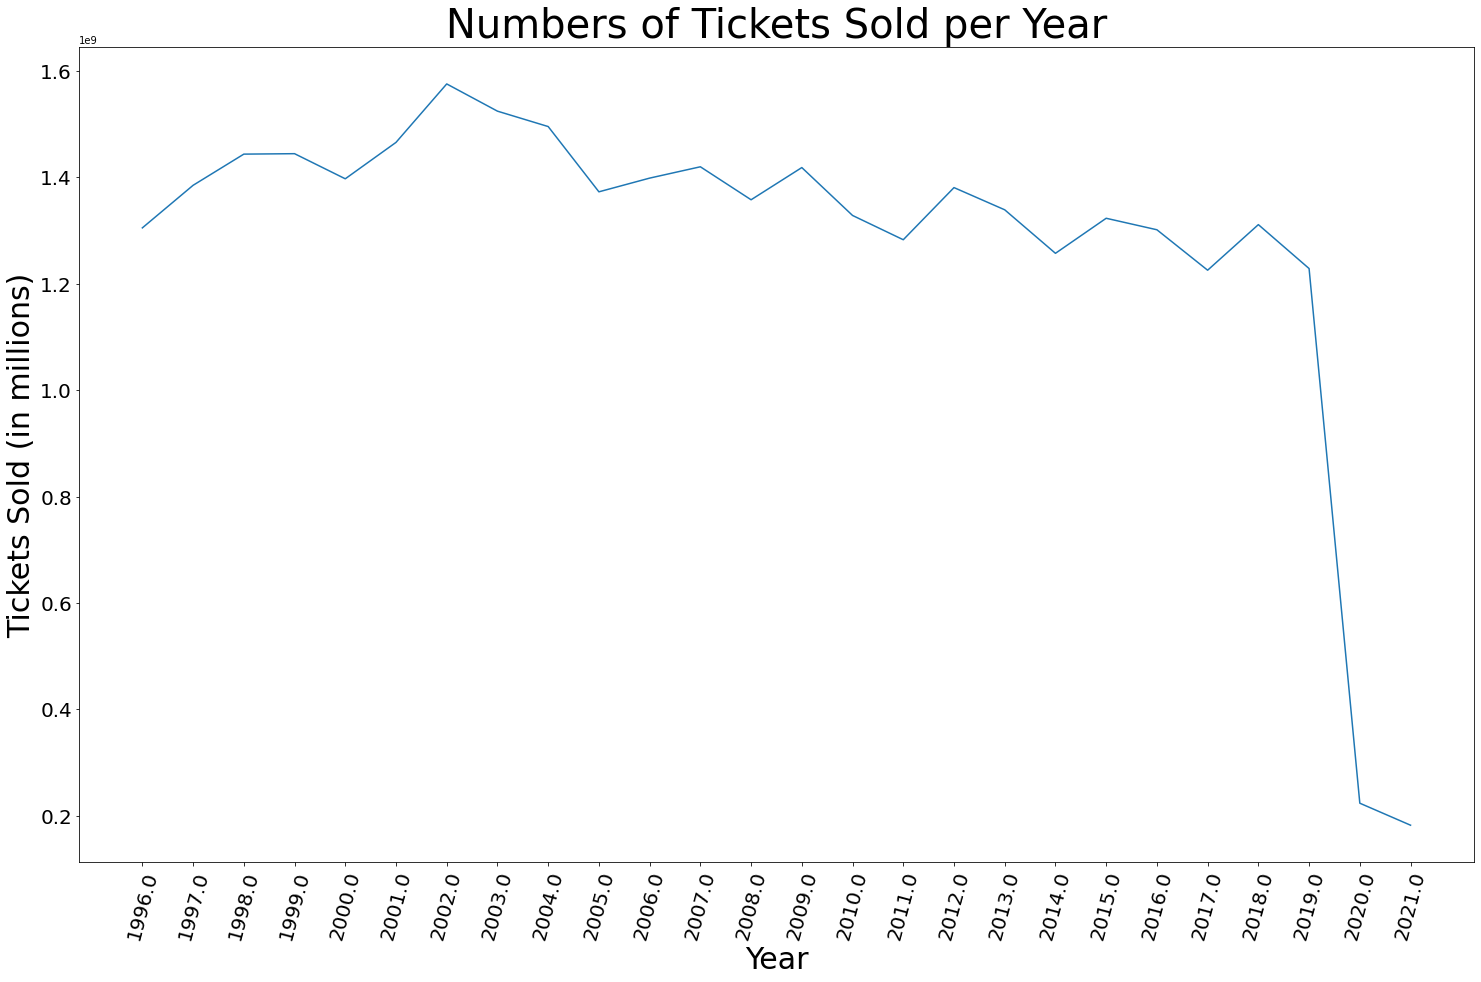

In [26]:
x = df2['Year'].astype(str)
y = df2['Tickets Sold'].values

plot_two_fig, plot_two_ax = plt.subplots(figsize=(25,15))
plot_two_ax.plot(x, y)

plot_two_ax.tick_params(axis='x', labelsize=20, rotation = 75)
plot_two_ax.tick_params(axis='y', labelsize=20)
plot_two_ax.set_title('Numbers of Tickets Sold per Year', fontsize=40)
plot_two_ax.set_xlabel('Year', fontsize=30)
plot_two_ax.set_ylabel('Tickets Sold (in millions)', fontsize=30)

In [27]:
df3 = pd.read_csv('data/streaming_revenue.csv')
df3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Year,Subscriptions revenue in billions,NaN,NaN,NaN,NaN
1,NaN,2020,10.36,NaN,NaN,NaN,NaN
2,NaN,2019,9.74,NaN,NaN,NaN,NaN
3,NaN,2018,8.95,NaN,NaN,NaN,NaN
4,NaN,2017,8.17,NaN,NaN,NaN,NaN
5,NaN,2016,7.36,NaN,NaN,NaN,NaN
6,NaN,2015,6.41,NaN,NaN,NaN,NaN
7,NaN,2014,5.53,NaN,NaN,NaN,NaN
8,NaN,2013,4.6,NaN,NaN,NaN,NaN
9,NaN,2012,2.79,NaN,NaN,NaN,NaN


In [28]:
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
df3


,Unnamed: 1,Unnamed: 2
0,Year,Subscriptions revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79


In [29]:
df3 = df3.dropna()
df3_renamed = df3.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "Subscription revenue in billions"})
df3_renamed

,Year,Subscription revenue in billions
0,Year,Subscriptions revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79


In [30]:
df3_renamed = df3_renamed.drop([0])
df3_renamed

,Year,Subscription revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79
10,2011,2.4


In [31]:
df3_renamed = df3_renamed.sort_values(['Year'], ascending=True)
df3_renamed

,Year,Subscription revenue in billions
10,2011,2.4
9,2012,2.79
8,2013,4.6
7,2014,5.53
6,2015,6.41
5,2016,7.36
4,2017,8.17
3,2018,8.95
2,2019,9.74
1,2020,10.36


Text(0, 0.5, 'Revenue of Subscriptions in billions')

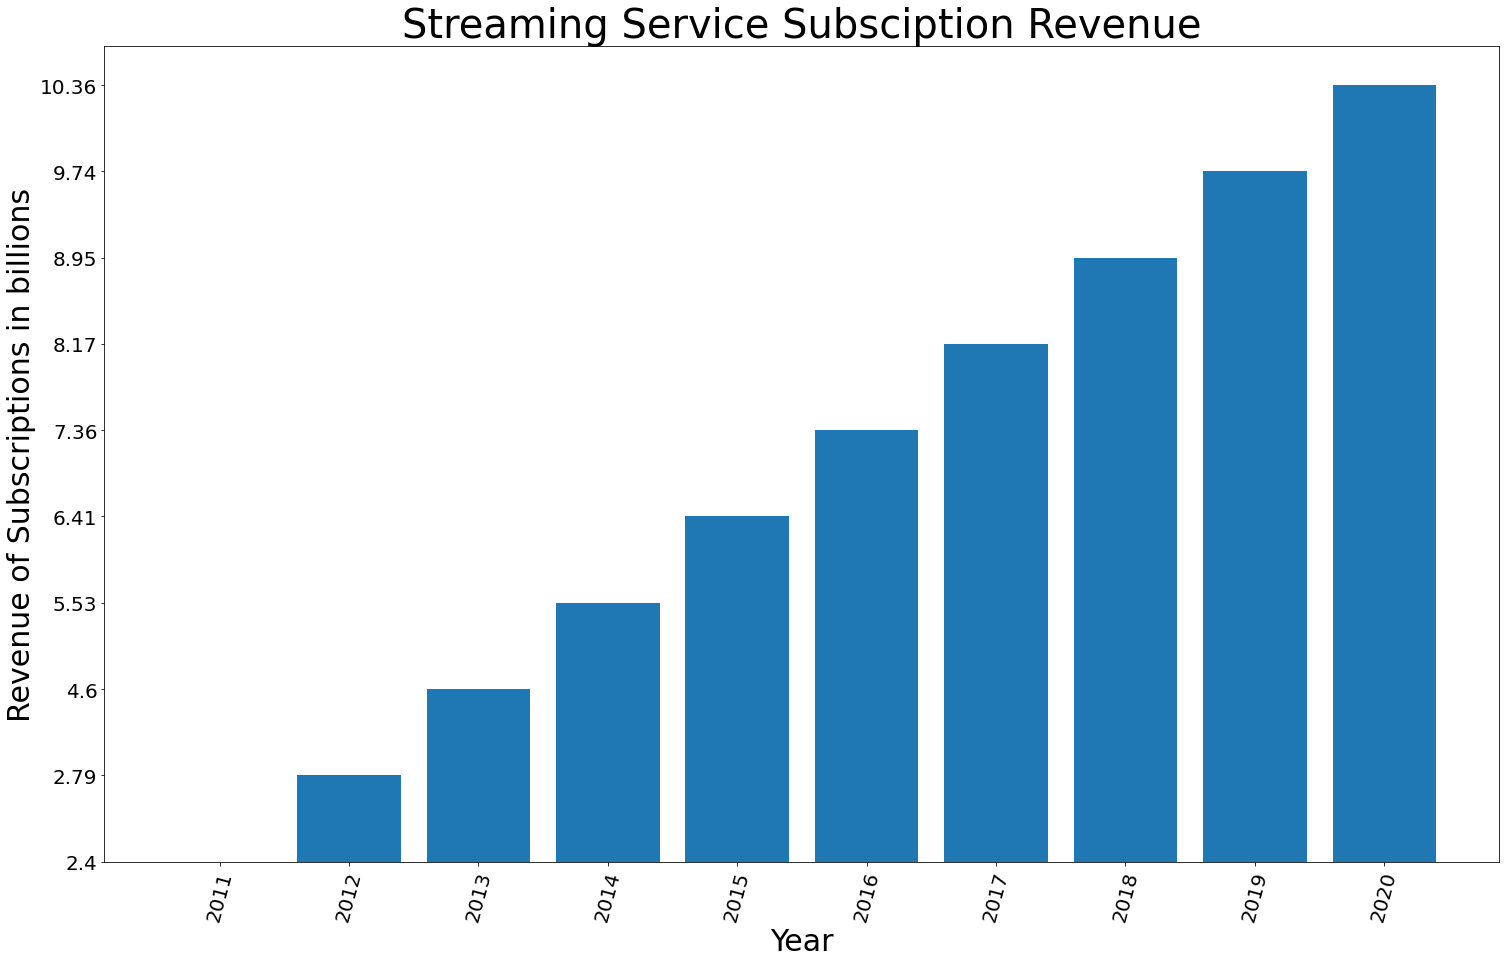

In [32]:
x = df3_renamed['Year'].astype(str)
y = df3_renamed['Subscription revenue in billions'].values

plot_three_fig, plot_three_ax = plt.subplots(figsize=(25,15))
plot_three_ax.bar(x, y)

plot_three_ax.tick_params(axis='x', labelsize=20, rotation = 75)
plot_three_ax.tick_params(axis='y', labelsize=20)
plot_three_ax.set_title('Streaming Service Subsciption Revenue', fontsize=40)
plot_three_ax.set_xlabel('Year', fontsize=30)
plot_three_ax.set_ylabel('Revenue of Subscriptions in billions', fontsize=30)

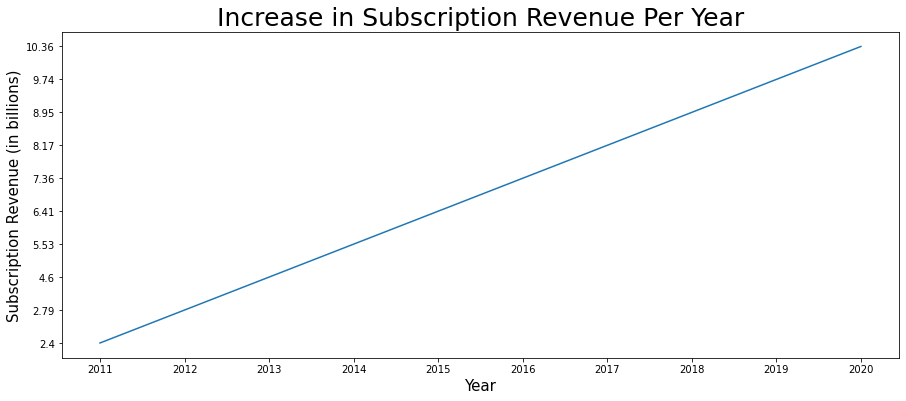

In [70]:

import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots(figsize=(15,6))  
x = df3_renamed['Year'] 
y = df3_renamed['Subscription revenue in billions']
  
plt.plot(x, y)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Subscription Revenue (in billions)", fontsize=15)
plt.title("Increase in Subscription Revenue Per Year", fontsize=25)
plt.show()  

In [34]:
df4 = pd.read_csv('data/streaming_subscription_data.csv')
df4

Table 1
NaN Year Number of Netflix Subscribers Number of HBO Subscribers Number of Hulu Subscribers      NaN
    2013 31.71                         43                        4                               NaN
    2014 37.7                          46                        6                               NaN
    2015 43.4                          49                        10                              NaN
    2016 47.91                         49                        12                              NaN
    2017 52.81                         54                        17                              NaN
    2018 58.49                         50                        25                              NaN
    2019 61.04                         43                        28.5                            NaN
    2020 73.94                         41                        36.6                            NaN
    2021 74.38                         44.2                      41.6                            NaN
    NaN  NaN                           NaN                       NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN

In [35]:
df4 = df4.drop(['Table 1'], axis=1)
df4

Empty DataFrame
Columns: []
Index: [(nan, Year, Number of Netflix Subscribers, Number of HBO Subscribers, Number of Hulu Subscribers), (nan, 2013, 31.71, 43, 4), (nan, 2014, 37.7, 46, 6), (nan, 2015, 43.4, 49, 10), (nan, 2016, 47.91, 49, 12), (nan, 2017, 52.81, 54, 17), (nan, 2018, 58.49, 50, 25), (nan, 2019, 61.04, 43, 28.5), (nan, 2020, 73.94, 41, 36.6), (nan, 2021, 74.38, 44.2, 41.6), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan)]

In [36]:
df4 = df4.reset_index()

In [37]:
df4

,level_0,level_1,level_2,level_3,level_4
0,NaN,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,NaN,2013,31.71,43,4
2,NaN,2014,37.7,46,6
3,NaN,2015,43.4,49,10
4,NaN,2016,47.91,49,12
5,NaN,2017,52.81,54,17
6,NaN,2018,58.49,50,25
7,NaN,2019,61.04,43,28.5
8,NaN,2020,73.94,41,36.6
9,NaN,2021,74.38,44.2,41.6


In [38]:
df4 = df4.drop(['level_0'], axis=1)
df4

,level_1,level_2,level_3,level_4
0,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In [39]:
list(df4.iloc[0])

['Year',
 'Number of Netflix Subscribers',
 'Number of HBO Subscribers',
 'Number of Hulu Subscribers']

In [40]:
df4.columns = list(df4.iloc[0])

In [41]:
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
0,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In [42]:
df4 = df4.drop([0])
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6
10,NaN,NaN,NaN,NaN


In [43]:
df4 = df4.dropna()
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In [55]:
df4 = df4.astype(float)
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013.0,31.71,43.0,4.0
2,2014.0,37.70,46.0,6.0
3,2015.0,43.40,49.0,10.0
4,2016.0,47.91,49.0,12.0
5,2017.0,52.81,54.0,17.0
6,2018.0,58.49,50.0,25.0
7,2019.0,61.04,43.0,28.5
8,2020.0,73.94,41.0,36.6
9,2021.0,74.38,44.2,41.6


In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      float64
 1   Number of Netflix Subscribers  9 non-null      float64
 2   Number of HBO Subscribers      9 non-null      float64
 3   Number of Hulu Subscribers     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


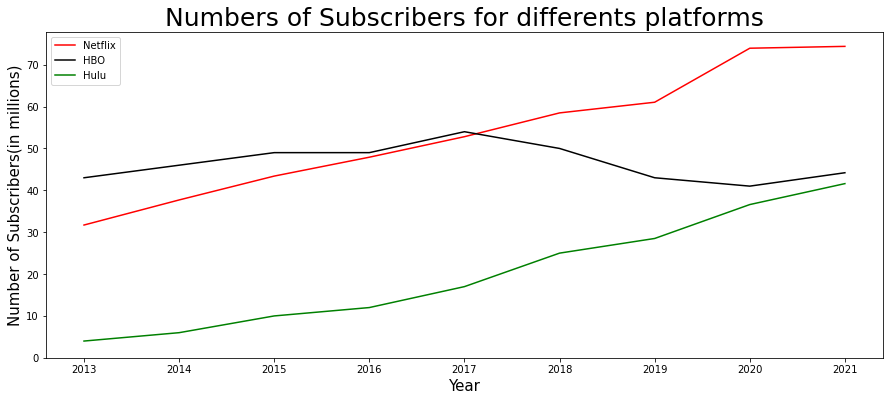

In [71]:

import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots(figsize=(15,6))
x1 = df4['Year']
y1 = df4['Number of Netflix Subscribers']
plt.plot(x1, y1, label = "Netflix", color = 'red')
x2 = df4['Year']
y2 = df4['Number of HBO Subscribers']
plt.plot(x2, y2, label = "HBO", color = 'black')
x3 = df4['Year']
y3 = df4['Number of Hulu Subscribers']
plt.plot(x3, y3, label = "Hulu", color = 'green') 


plt.legend()

plt.xlabel("Year", fontsize=15)
plt.yticks(np.arange(0, 80, 10)) 
plt.ylabel("Number of Subscribers(in millions)", fontsize=15)
plt.title("Numbers of Subscribers for differents platforms", fontsize=25)
  

plt.show() 